In [1]:
import BondGraphTools as bgt
model = bgt.new(name="Simple Reaction")

In [2]:
K_A=50
K_B=20
K_C=10
K_D=5

R=8.314
T=300

Ce_A = bgt.new("Ce", name="A", library="BioChem", value={'k':K_A , 'R':R, 'T':T})
Ce_B= bgt.new("Ce", name="B", library="BioChem", value={'k':K_B, 'R':R, 'T':T})
Ce_C= bgt.new("Ce", name="C", library="BioChem", value={'k':K_C, 'R':R, 'T':T})
Ce_D= bgt.new("Ce", name="D", library="BioChem", value={'k':K_D, 'R':R, 'T':T})
reaction = bgt.new("Re", library="BioChem", value={'r':None, 'R':R, 'T':T})

A_junction = bgt.new("0")
B_junction = bgt.new("0")
C_junction = bgt.new("0")
D_junction = bgt.new("0")

one_junction_1 = bgt.new("1")
one_junction_2 = bgt.new("1")

bgt.add(model, Ce_A, Ce_B, Ce_C, Ce_D, A_junction, B_junction, C_junction, D_junction, one_junction_1, one_junction_2, reaction)

In [3]:
bgt.connect(Ce_A, A_junction)
bgt.connect(A_junction, one_junction_1)
bgt.connect(Ce_B, B_junction)
bgt.connect(B_junction, one_junction_1)
bgt.connect(one_junction_1, reaction)
bgt.connect(reaction, one_junction_2)
bgt.connect(one_junction_2, C_junction)
bgt.connect(C_junction, Ce_C)
bgt.connect(one_junction_2, D_junction)
bgt.connect(D_junction, Ce_D)

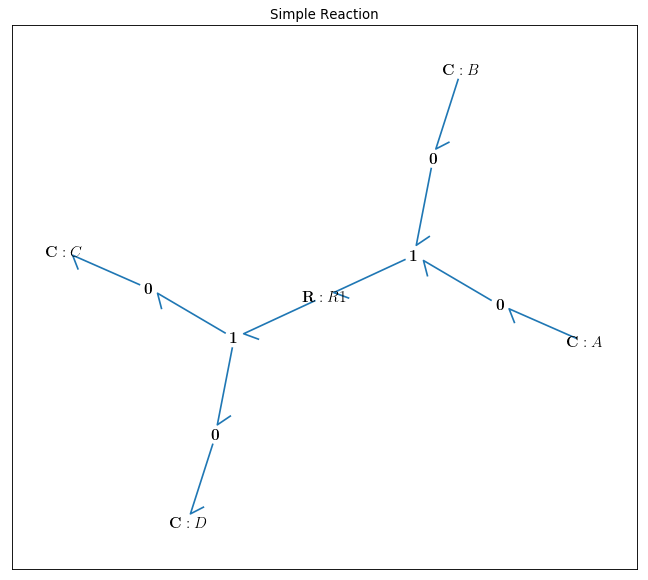

In [5]:
bgt.draw(model)

In [6]:
model.state_vars

{'x_0': (C: A, 'q_0'),
 'x_1': (C: B, 'q_0'),
 'x_2': (C: C, 'q_0'),
 'x_3': (C: D, 'q_0')}

In [7]:
model.constitutive_relations

[dx_0 + 1000*u_0*x_0*x_1 - 50*u_0*x_2*x_3,
 dx_1 + 1000*u_0*x_0*x_1 - 50*u_0*x_2*x_3,
 dx_2 - 1000*u_0*x_0*x_1 + 50*u_0*x_2*x_3,
 dx_3 - 1000*u_0*x_0*x_1 + 50*u_0*x_2*x_3]

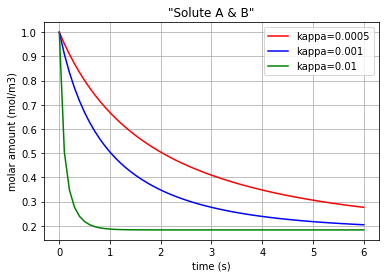

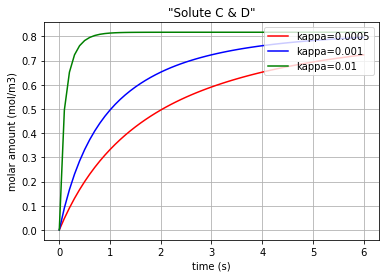

In [8]:
import matplotlib.pyplot as plt
x0 = {"x_0":1, "x_1":1, "x_2":0, "x_3":0}
t_span = [0,6]

for c, kappa, label in [('r', 0.0005, 'kappa=0.0005'), ('b', 0.001, 'kappa=0.001'), ('g', 0.01,'kappa=0.01')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    plt.plot(t,x[:,0], c, label=label)
    plt.title('"Solute A & B"')
    plt.xlabel("time (s)")
    plt.ylabel("molar amount (mol/m3)")
    plt.legend(loc='upper right')
    plt.grid()
plt.show()


for c, kappa, label in [('r', 0.0005, 'kappa=0.0005'), ('b', 0.001, 'kappa=0.001'), ('g', 0.01,'kappa=0.01')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    plt.plot(t,x[:,2], c, label=label)
    plt.title('"Solute C & D"')
    plt.xlabel("time (s)")
    plt.ylabel("molar amount (mol/m3)")
    plt.legend(loc='upper right')
    plt.grid()
plt.show()


    

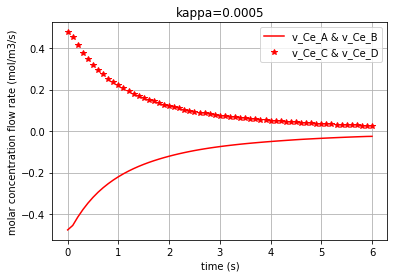

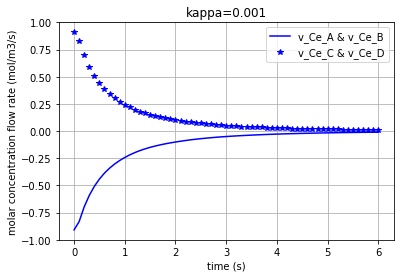

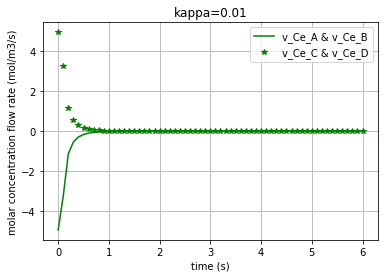

In [9]:
# Calculating the molar concentration flow rate of the solutes
#  dq_Ce_A/dt = v_Ce_A (flow in the Ce_A)
#  dq_Ce_B/dt = v_Ce_B (flow in the Ce_B)
#  dq_Ce_C/dt = v_Ce_C (flow in the Ce_C)
#  dq_Ce_D/dt = v_Ce_D (flow in the Ce_D)

import matplotlib.pyplot as plt
import numpy as np
for c, kappa, title in [('r', 0.0005, 'kappa=0.0005'), ('b', 0.001, 'kappa=0.001'), ('g', 0.01,'kappa=0.01')]:
    t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})
    f = np.array(x[:,0], dtype=float)
    v_Ce_A=np.gradient(f,0.1)
    
    f = np.array(x[:,1], dtype=float)
    slope=np.gradient(f,0.1)
    v_Ce_B=slope

    f = np.array(x[:,2], dtype=float)
    slope=np.gradient(f,0.1)
    v_Ce_C=slope
    
    f = np.array(x[:,3], dtype=float)
    slope=np.gradient(f,0.1)
    v_Ce_D=slope
    
    plt.plot(t,v_Ce_A, c, label='v_Ce_A & v_Ce_B')        # v_Ce_A & v_Ce_B have the same amounts
    plt.plot(t,v_Ce_C, c+'*', label='v_Ce_C & v_Ce_D')    # v_Ce_C & v_Ce_D have the same amounts
    
    leg1=plt.legend(loc='upper right')
    plt.xlabel("time (s)")
    plt.ylabel("molar concentration flow rate (mol/m3/s)")
    plt.title(title)
    plt.grid()    
    plt.show()


c:\users\nsha457\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log
  
c:\users\nsha457\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log


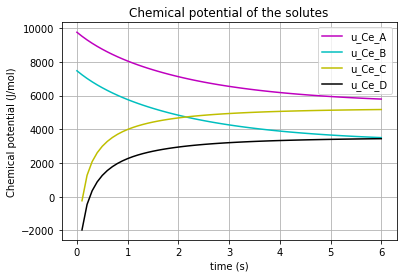

In [10]:
# Calculating & plotting the solutes chemical potentials (u_Ce_A & u_Ce_B & u_Ce_C & u_Ce_D)
# for kappa=0.001

kappa=0.001
t, x = bgt.simulate(model, x0=x0, timespan=t_span, control_vars={"u_0":kappa})

q_Ce_A = np.array(x[:,0], dtype=float)
u_Ce_A=R*T*np.log(K_A*q_Ce_A)

q_Ce_B = np.array(x[:,1], dtype=float)
u_Ce_B=R*T*np.log(K_B*q_Ce_B)

q_Ce_C = np.array(x[:,2], dtype=float)
u_Ce_C=R*T*np.log(K_C*q_Ce_C)

q_Ce_D = np.array(x[:,3], dtype=float)
u_Ce_D=R*T*np.log(K_D*q_Ce_D)

plt.plot(t,u_Ce_A, 'm', label='u_Ce_A')
plt.plot(t,u_Ce_B, 'c', label='u_Ce_B')
plt.plot(t,u_Ce_C, 'y', label='u_Ce_C')
plt.plot(t,u_Ce_D, 'k', label='u_Ce_D')
plt.legend(loc='upper right')
plt.xlabel("time (s)")
plt.ylabel("Chemical potential (J/mol)")
plt.title('Chemical potential of the solutes')
plt.grid()   

# Note the differences which the "K"s make in the chemical potential of the solutes.
# If the "K"s were all the same, the chemical potential of the solutes A & B and the chemical potential of the solutes C & D
# would be pairwise equal. 